In [10]:
#Current Notebook

#Name: Yvonne Yu
#Date: September 21st, 2023

In [11]:
#packages needed
library(dplyr)
library(ggplot2)
library(limma)
library(edgeR)
library(stringr)
library(Glimma)
library(tidyr)

Part 1a: Generating Boxplot Figures utilizing the miRNAseq dataset to visualize the Qubit Concentration

In [12]:
#load the file to be used (should be the meta file that contains the samples)

#I had used the DGElist because everything was formatted already, but could use read.csv() function
load("20230822DGEList_miRNAseq.Rdata")
meta <- x$samples 
head(meta)

,group,lib.size,norm.factors,LL_ID,Name,Group,Higher_Grouping,Donor_Sex,Pregnancy_Status,Biofluid,Date,Method,Extraction_Vol,BBM_Vol,Qubit,Index_Sequence
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LL10680,1,424684,1,LL10680,f_ser_mirv_100_1,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,GGCAAGTT
LL10681,1,384625,1,LL10681,m_ser_mirv_100_3,MagMAX_mirVana_Single,MagMAX_Manufacture,Male,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,GATCTTGC
LL10682,1,466938,1,LL10682,f_ser_mirv_100_2,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,CAATGCGA
LL10683,1,148535,1,LL10683,f_ser_mirv_200_1,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,200,20,,GGTGTACA
LL10684,1,399488,1,LL10684,f_ser_mirv_100_3,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,TAGGAGCT
LL10685,1,332666,1,LL10685,f_ser_mirv_200_2,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,200,20,,CGAATTGC


In [13]:
#create an object that includes samples of the target column
qubit2 <- dplyr::filter(meta, Qubit > 0)
qubit2 <- qubit2 %>% dplyr::filter(Qubit != "Out of range")

#change the qubit object type to a numeric (if it hasn't been changed already)
qubit2$Qubit <- as.numeric(qubit2$Qubit)
qubit2

#create two objects that subset the qubit object by Group of Interest    
plasma <- qubit2 %>% dplyr::filter(Biofluid == "Plasma")
serum <- qubit2 %>% dplyr::filter(Biofluid == "Serum")

,group,lib.size,norm.factors,LL_ID,Name,Group,Higher_Grouping,Donor_Sex,Pregnancy_Status,Biofluid,Date,Method,Extraction_Vol,BBM_Vol,Qubit,Index_Sequence
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
LL15700,1,4512620,1,LL15700,F_PR_MM_AS_PL_1,MagMAX_Single,MagMAX_Single,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.25,TCGTCTGA
LL15702,1,4052292,1,LL15702,F_PR_MM_AS_PL_3,MagMAX_Single,MagMAX_Single,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.56,CTGTACCA
LL15725,1,4450597,1,LL15725,F_PR_MM_DD_SE_2,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Serum,2022-11-08,MagMAX_mirVana,166.67,30,1.21,CCAGTATC
LL15727,1,3204834,1,LL15727,F_PR_MM_DD_SE_4,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Serum,2022-11-08,MagMAX_mirVana,166.67,30,0.92,GTAACCGA
LL15736,1,7150662,1,LL15736,F_PR_MM_DD_PL_1,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.61,AAGACCGT
LL15737,1,3286906,1,LL15737,F_PR_MM_DD_PL_2,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.24,TTGCGAGA
LL15738,1,12431409,1,LL15738,F_PR_MM_DD_PL_3,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.47,GCAATTCC
LL15739,1,8710562,1,LL15739,F_PR_MM_DD_PL_4,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Plasma,2022-11-08,MagMAX_mirVana,166.67,30,1.17,GAATCCGT
LL15761,1,3664027,1,LL15761,F_PR_MM_DE_SE_2,MagMAX_Drydown,MagMAX_Drydown,Female,Pregnant,Serum,2022-11-08,MagMAX_mirVana,166.67,30,0.88,CGAATTGC


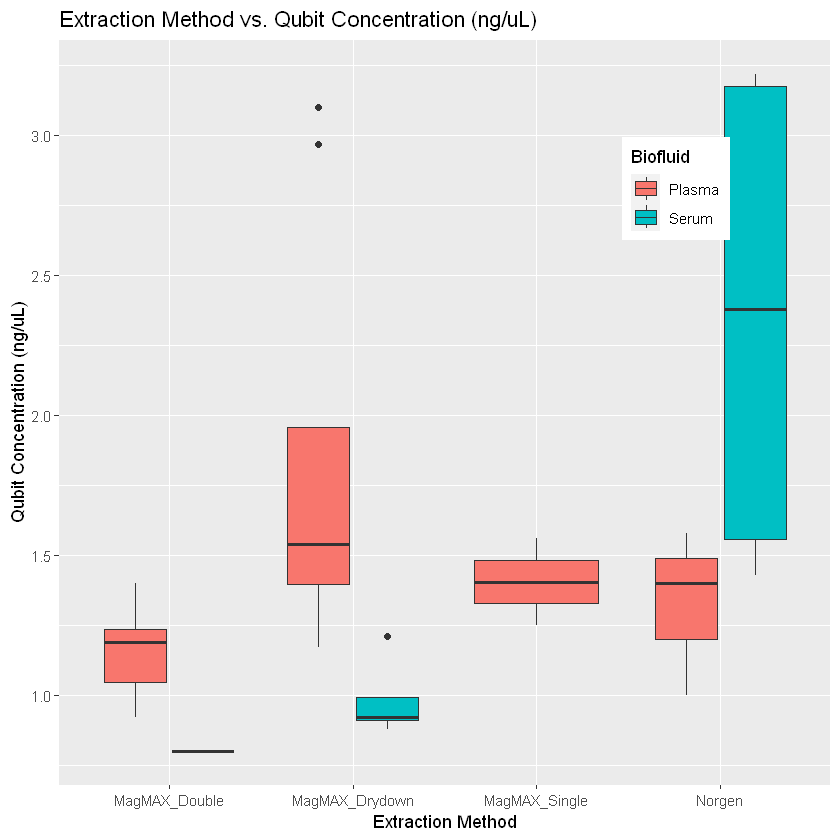

In [14]:
#create the boxplot
t <- ggplot(qubit2, aes(x = Higher_Grouping, y = Qubit, fill = Biofluid)) + geom_boxplot()
t + labs(x = "Extraction Method", y = "Qubit Concentration (ng/uL)", title = "Extraction Method vs. Qubit Concentration (ng/uL)") + 
    theme(legend.position = c(0.8, 0.8))

Part 1b: Creating Stacked Bar graphs to breakdown the genetic material identified in each Sample

In [15]:
#input the file to be used 
#any file works as long as it breakdowns the library size of each sample and the Group of interest
#make sure that there is a total library size column
m <- read.csv("Plasma_BioType.csv")

#altering the formatting of the file 
row <- function(df) {
    rownames(df) <- as.character(unlist(df[,3]))
    df[,-3]
}
m1 <- row(m)
m <- m1

m$Total <- rowSums(m[3:9])
colnames(m)[1] <- "Sample.ID"

m$Name <- gsub("MagMAX_Single", "Single", m$Name)
m$Name <- gsub("MagMAX_Double15", "Double15", m$Name)
m$Name <- gsub("MagMAX_Double20", "Double20", m$Name)
m$Name <- gsub("MagMAX_Double30", "Double30", m$Name)
m$Name <- gsub("MagMAX_Drydown", "Drydown", m$Name)
m

,Sample.ID,Name,miRNA,rRNA,tRNA,piRNA,Gencode,Other,Unmapped,Input,successfully_clipped,Total
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,LL15708,Single,1093470,53002,5376,955,88281,23380,117297,2108600,1815197,1381761
2,LL15709,Single,1209014,39762,6589,885,133980,24788,131932,2384972,2015740,1546950
3,LL15710,Single,995845,20905,4112,504,79019,19354,123846,1960326,1611194,1243585
4,LL15711,Single,1444490,31557,6493,827,94982,30515,157112,2758896,2342723,1765976
5,LL18887,Single,1323757,24241,4400,1070,106651,30875,185018,2601166,2213469,1676012
6,LL18888,Single,1893316,36862,7156,1540,145203,44024,233068,3489189,2986930,2361169
7,LL18889,Single,1642010,33234,5666,1505,127651,43236,251276,3263716,2785352,2104578
8,LL18890,Single,963467,18557,4126,858,79410,20251,116185,1759791,1508511,1202854
9,LL15700,Single,4512620,46164,20377,9627,502534,43072,272719,5715466,5573079,5407113


In [16]:
#create a new dataframe that shows the percent for each group for each sample

#include the Sample Name and the Groups
m1 <- data.frame(m$Sample.ID, m$Name)

#function that determines the percentages of each group type by the total
divide <- function(ks) {
    ps <- (ks / m$Total) * 100
    ps
}

#creates columns for each group type, showing the library size percents of each 
m1$miRNA <- divide(m$miRNA)
m1$rRNA <- divide(m$rRNA)
m1$tRNA <- divide(m$tRNA)
m1$piRNA <- divide(m$piRNA)
m1$Gencode <- divide(m$Gencode)
m1$Other <- divide(m$Other)
m1$Unmapped <- divide(m$Unmapped)

#rename the column names
colnames(m1)[1] <- "Sample.ID"
colnames(m1)[2] <- "Method"
m1

Sample.ID,Method,miRNA,rRNA,tRNA,piRNA,Gencode,Other,Unmapped
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LL15708,Single,79.13597,3.8358298,0.3890687,0.06911470,6.389021,1.6920437,8.488950
LL15709,Single,78.15469,2.5703481,0.4259349,0.05720935,8.660913,1.6023789,8.528524
LL15710,Single,80.07856,1.6810270,0.3306569,0.04052799,6.354129,1.5563070,9.958789
LL15711,Single,81.79556,1.7869439,0.3676720,0.04682963,5.378442,1.7279397,8.896610
LL18887,Single,78.98255,1.4463500,0.2625280,0.06384202,6.363379,1.8421706,11.039181
LL18888,Single,80.18554,1.5611758,0.3030702,0.06522193,6.149623,1.8645002,9.870873
LL18889,Single,78.02087,1.5791289,0.2692226,0.07151077,6.065396,2.0543786,11.939496
LL18890,Single,80.09842,1.5427475,0.3430175,0.07133035,6.601799,1.6835792,9.659111
LL15700,Single,83.45711,0.8537643,0.3768554,0.17804326,9.293943,0.7965804,5.043708


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Sample.ID,LL15708,LL15709,LL15710,LL15711,LL18887,LL18888,LL18889,LL18890,LL15700,LL15701,...,LL18984,LL18985,LL18986,LL15812,LL15813,LL15814,LL15815,LL18987,LL18988,LL18989
Method,Single,Single,Single,Single,Single,Single,Single,Single,Single,Single,...,Norgen,Norgen,Norgen,Norgen,Norgen,Norgen,Norgen,Norgen,Norgen,Norgen
miRNA,79.13597,78.15469,80.07856,81.79556,78.98255,80.18554,78.02087,80.09842,83.45711,83.01318,...,65.83628,75.08765,62.40945,60.47919,59.42993,57.37154,49.96159,57.16989,57.31783,55.35112
rRNA,3.8358298,2.5703481,1.6810270,1.7869439,1.4463500,1.5611758,1.5791289,1.5427475,0.8537643,0.7750288,...,3.7743516,1.8487258,4.7641690,2.3755062,2.2251566,2.4141610,2.2465098,2.3769173,2.2593516,2.4289865
tRNA,0.3890687,0.4259349,0.3306569,0.3676720,0.2625280,0.3030702,0.2692226,0.3430175,0.3768554,0.3759165,...,0.8152794,0.4929609,0.6910952,0.4126922,0.4223945,0.3997640,0.3647017,0.4358947,0.4006735,0.3925214
piRNA,0.06911470,0.05720935,0.04052799,0.04682963,0.06384202,0.06522193,0.07151077,0.07133035,0.17804326,0.18526265,...,0.57778640,0.27723945,0.29198069,0.10879225,0.10733435,0.11843420,0.10247512,0.12571755,0.11335476,0.12623382
Gencode,6.389021,8.660913,6.354129,5.378442,6.363379,6.149623,6.065396,6.601799,9.293943,9.778279,...,19.894255,14.624593,17.119399,8.233036,8.385847,8.807547,8.844859,10.226022,9.210770,9.781145
Other,1.6920437,1.6023789,1.5563070,1.7279397,1.8421706,1.8645002,2.0543786,1.6835792,0.7965804,0.8069334,...,0.7836485,0.7066894,1.3974797,2.2063040,2.2361766,2.3033137,2.4167475,1.9313960,2.2611030,2.0626005
Unmapped,8.488950,8.528524,9.958789,8.896610,11.039181,9.870873,11.939496,9.659111,5.043708,5.065403,...,8.318399,6.962137,13.326424,26.184483,27.193156,28.585237,36.063114,27.734160,28.436918,29.857396


Sample.ID,Method,gene_types,percent
<chr>,<chr>,<chr>,<dbl>
LL15708,Single,miRNA,79.13597214
LL15708,Single,rRNA,3.83582979
LL15708,Single,tRNA,0.38906873
LL15708,Single,piRNA,0.06911470
LL15708,Single,Gencode,6.38902097
LL15708,Single,Other,1.69204370
LL15708,Single,Unmapped,8.48894997
LL15709,Single,miRNA,78.15469149
LL15709,Single,rRNA,2.57034810


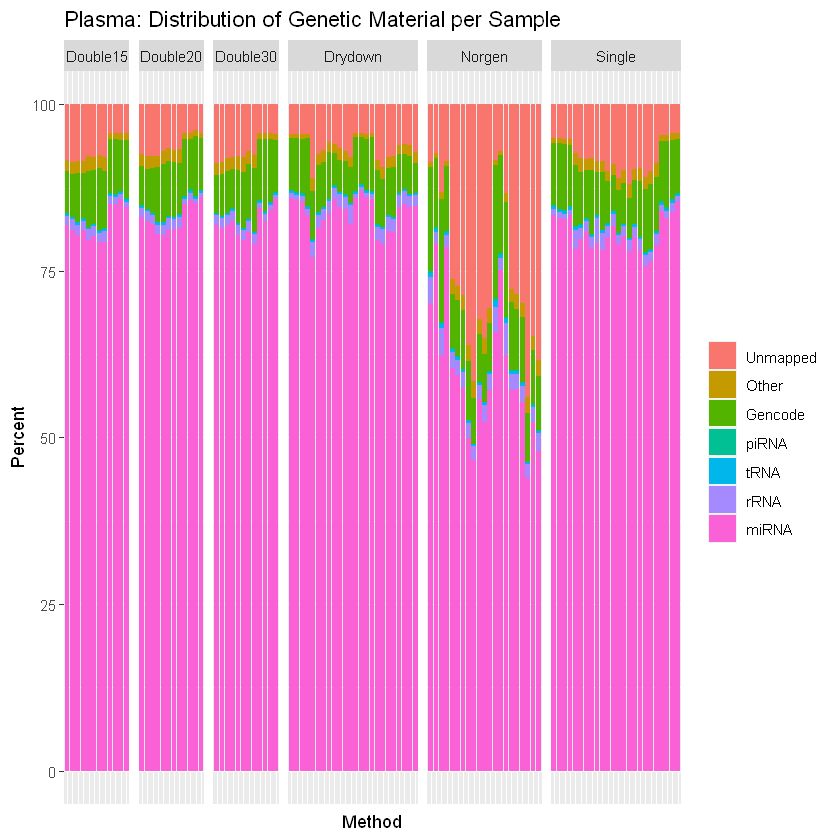

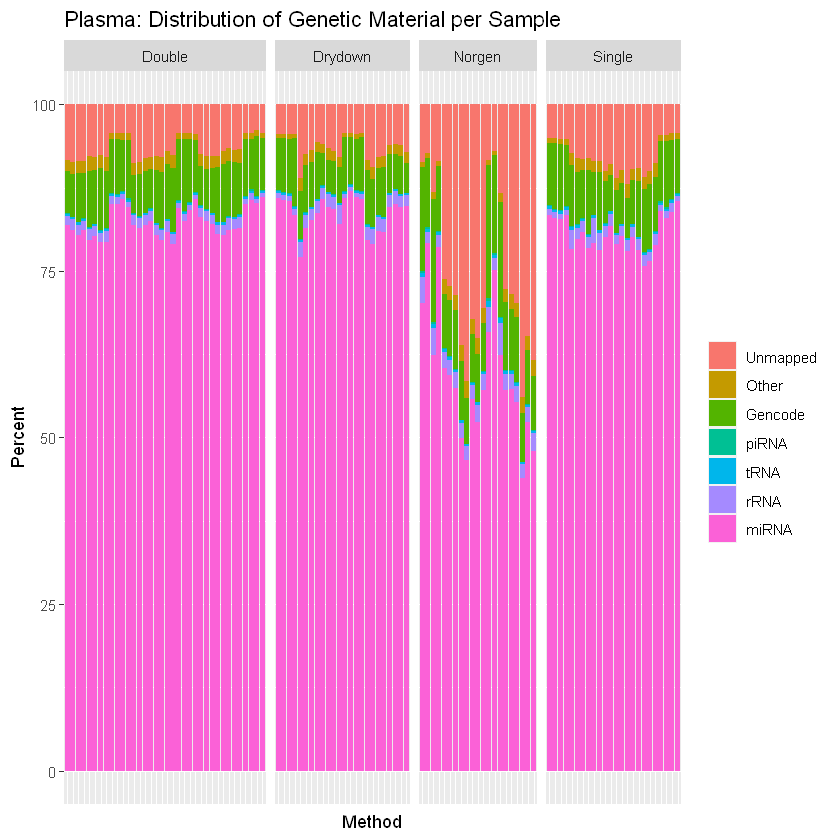

In [17]:
#create the stacked bargraph

#reformat the dataframe for usability for stacked bar graph
as.data.frame(t(m1)) 
mk <- m1 %>% pivot_longer(!c(Sample.ID, Method), names_to = "gene_types", values_to = "percent")
mk

#if a group can be grouped together, create a duplicate object of the previous dataframe, 
#and change the name to be the ideal group
km <- mk
km$Method <- gsub("Double15", "Double", km$Method)
km$Method <- gsub("Double20", "Double", km$Method)
km$Method <- gsub("Double30", "Double", km$Method)

#create a list of the types for the figures
mk$gene_types <- factor(mk$gene_types, levels = c("Unmapped", "Other", "Gencode", "piRNA", "tRNA", "rRNA", "miRNA"))
km$gene_types <- factor(km$gene_types, levels = c("Unmapped", "Other", "Gencode", "piRNA", "tRNA", "rRNA", "miRNA"))

#code for the figures 
h <- ggplot(data = mk, mapping = aes(x = Sample.ID, y = percent, fill = gene_types)) + 
  geom_bar(position = "stack", stat = "unique") + theme(legend.title= element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) + 
        facet_grid(~Method, scales="free", space="free_x")
h + labs(y = "Percent", x = "Method", title = "Plasma: Distribution of Genetic Material per Sample")

o <- ggplot(data = km, mapping = aes(x = Sample.ID, y = percent, fill = gene_types)) + 
  geom_bar(position = "stack", stat = "unique") + theme(legend.title= element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
        facet_grid(~Method, scales="free", space="free_x")
o + labs(y = "Percent", x = "Method", title = "Plasma: Distribution of Genetic Material per Sample")

Part 1c: Creating Scatterplots comparing total number of miRNA read counts vs the number of unique miRNAs per Sample with 10+ counts

In [18]:
#load the files with the miRNA counts
p <- read.csv("ComplexityPlots.csv")

#clean the file for easier usability
p1 <- data.frame(p[c(1,3,4,6,7,8,9),])

headers <- function(df) {
    colnames(df) <- as.character(unlist(df[1,]))
    df[-1,]
}

p2 <- headers(p1)
p2

,LL ID,LL18851,LL18852,LL18853,LL18854,LL18875,LL18876,LL18877,LL18878,LL18863,...,LL10827,LL10828,LL15716,LL15717,LL15718,LL15719,LL15824,LL15825,LL15826,LL15827
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,Group,MagMAX_Double15,MagMAX_Double15,MagMAX_Double15,MagMAX_Double15,MagMAX_Double20,MagMAX_Double20,MagMAX_Double20,MagMAX_Double20,MagMAX_Double30,...,MagMAX_Single,MagMAX_Single,MagMAX_Single,MagMAX_Single,MagMAX_Single,MagMAX_Single,miRcury,miRcury,miRcury,miRcury
4,Group 2,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,MagMAX_Double,...,,,,,,,,,,
6,Pregnancy Status,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,...,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant,Non-Pregnant
7,Biofluid,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,Plasma,...,Urine,Urine,Urine,Urine,Urine,Urine,Urine,Urine,Urine,Urine
8,TotalmiRNACount,1151842,2098004,1673459,1959612,2252120,1631835,2505062,2144781,1920650,...,82541,67758,467966,345769,264872,317200,173660,184161,218870,274171
9,Complexity,361,406,385,390,402,376,392,391,382,...,123,116,184,180,173,162,161,154,169,165


In [19]:
#create a new dataframe that includes the Sample name, Group(s) of Interest, total miRNA read count, 
#and number of unique miRNAs with 10+ counts
p3 <- data.frame(t(p2[-1]))
colnames(p3) <- p2[,1]
p3$TotalmiRNACount <- as.numeric(p3$TotalmiRNACount)
p3$Complexity <- as.numeric(p3$Complexity)

colnames(p3) <- gsub(" ", "_", colnames(p3))

#if necessary, separate the created dataframe by the subcategories to further isolate samples
plasma <- p3 %>% dplyr::filter(Biofluid == "Plasma")
head(plasma)

preg.p <- plasma %>% dplyr::filter(Pregnancy_Status == "Pregnant")
head(preg.p)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


,Group,Group_2,Pregnancy_Status,Biofluid,TotalmiRNACount,Complexity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
LL18851,MagMAX_Double15,MagMAX_Double,Non-Pregnant,Plasma,1151842,361
LL18852,MagMAX_Double15,MagMAX_Double,Non-Pregnant,Plasma,2098004,406
LL18853,MagMAX_Double15,MagMAX_Double,Non-Pregnant,Plasma,1673459,385
LL18854,MagMAX_Double15,MagMAX_Double,Non-Pregnant,Plasma,1959612,390
LL18875,MagMAX_Double20,MagMAX_Double,Non-Pregnant,Plasma,2252120,402
LL18876,MagMAX_Double20,MagMAX_Double,Non-Pregnant,Plasma,1631835,376


,Group,Group_2,Pregnancy_Status,Biofluid,TotalmiRNACount,Complexity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
LL18859,MagMAX_Double15,MagMAX_Double,Pregnant,Plasma,2754227,452
LL18860,MagMAX_Double15,MagMAX_Double,Pregnant,Plasma,3032351,464
LL18861,MagMAX_Double15,MagMAX_Double,Pregnant,Plasma,4131363,502
LL18862,MagMAX_Double15,MagMAX_Double,Pregnant,Plasma,2742556,437
LL18883,MagMAX_Double20,MagMAX_Double,Pregnant,Plasma,2704343,445
LL18884,MagMAX_Double20,MagMAX_Double,Pregnant,Plasma,3472845,492


Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."


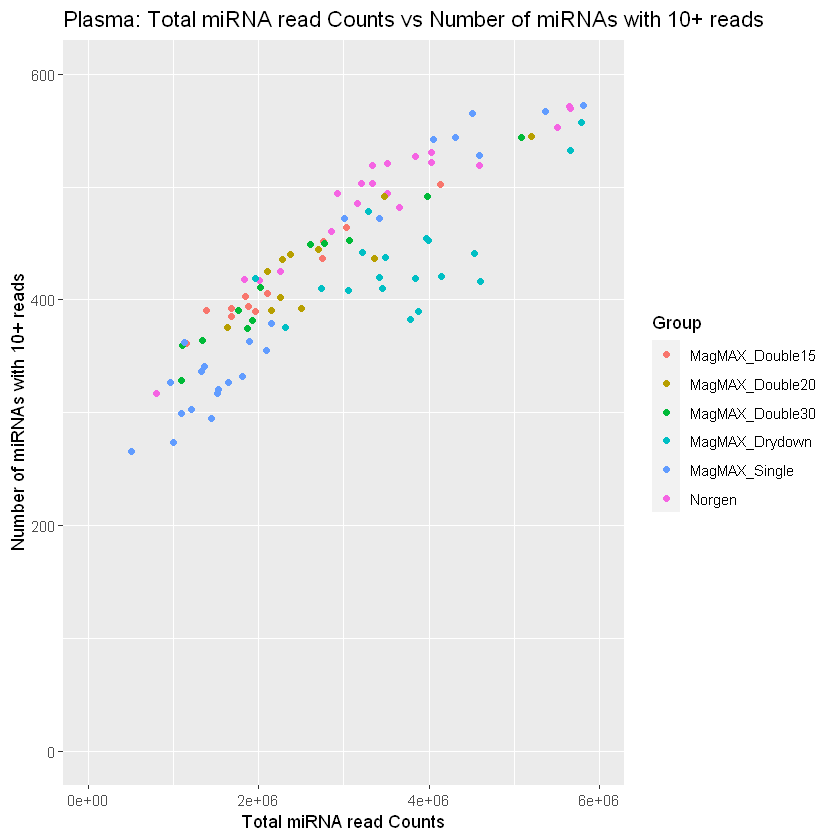

Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."


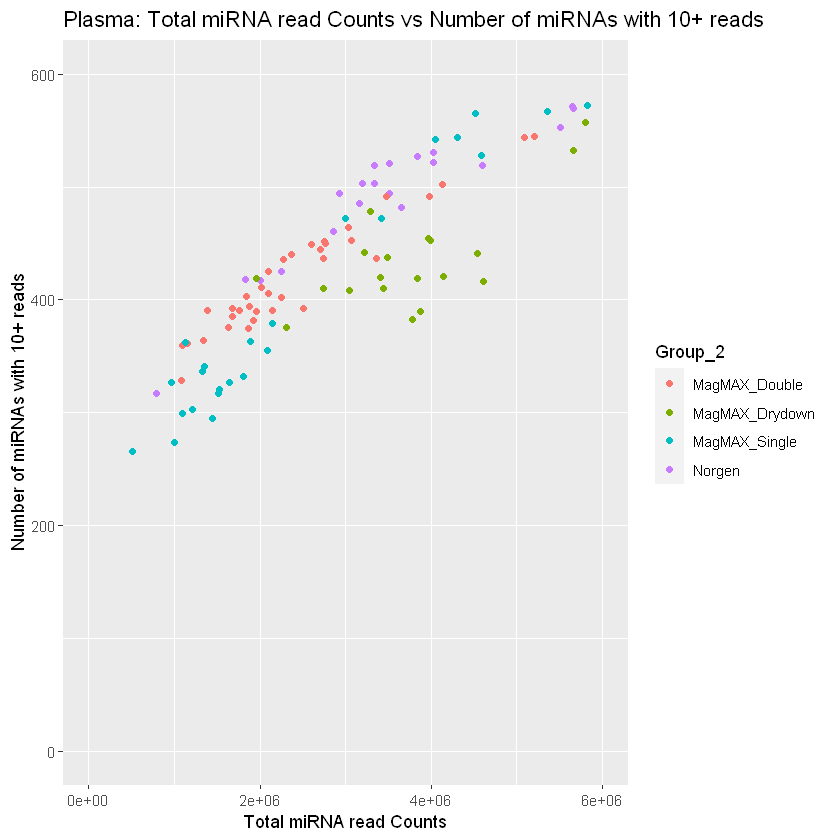

Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."


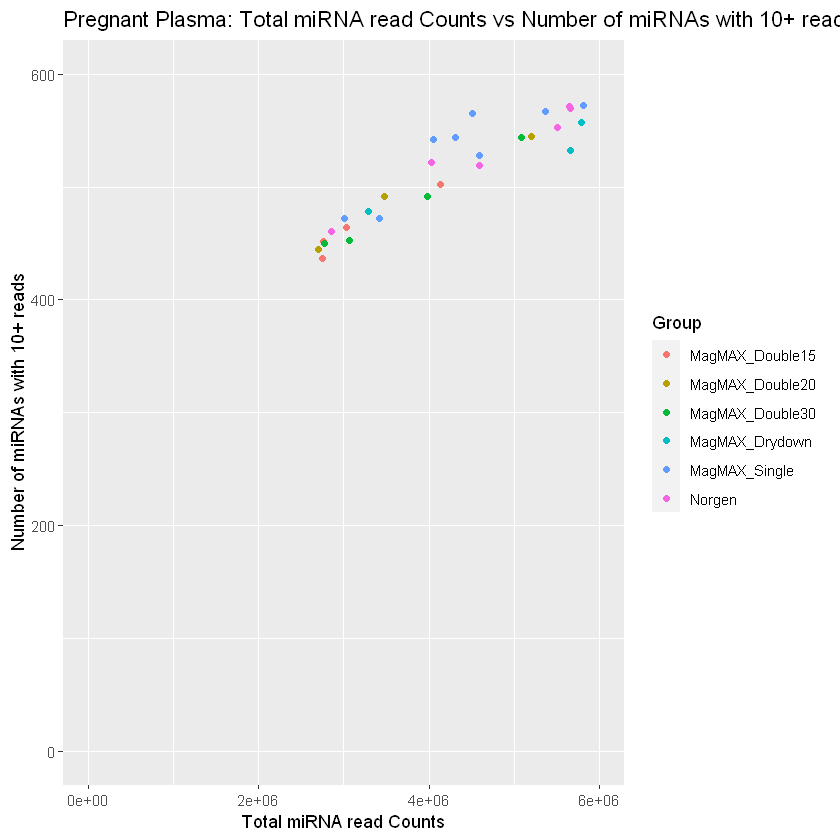

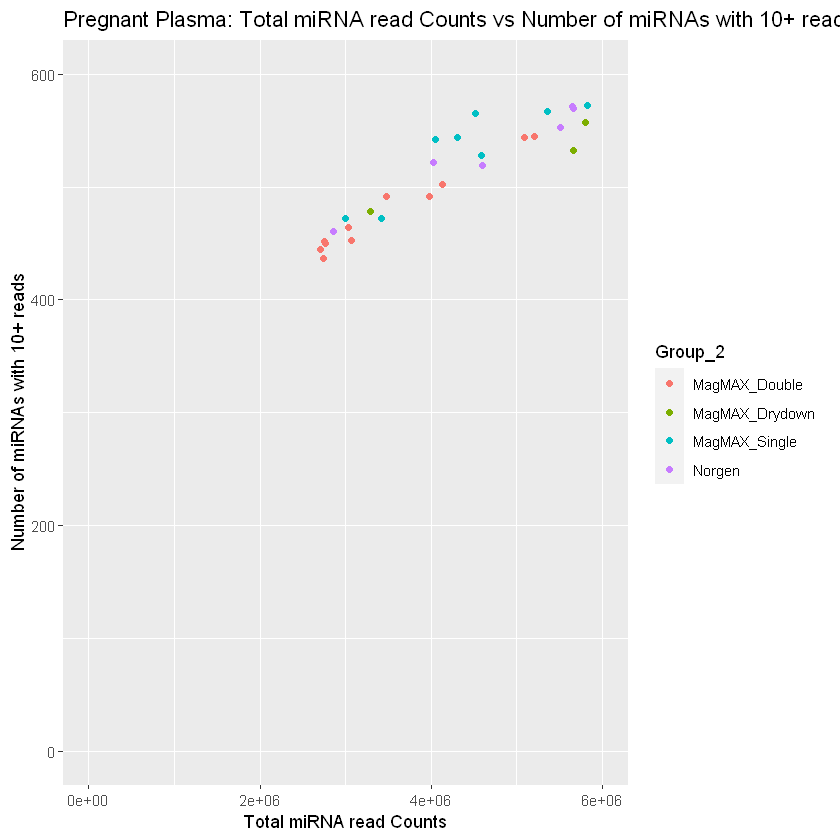

In [20]:
#create the scatterplots from the created dataframes

#x = Total miRNAs, y = number of unique miRNA, fill = Group of Interest

l <- ggplot(plasma, aes(x = TotalmiRNACount, y = Complexity, fill = Group, colour = Group)) + geom_point() + 
    scale_x_continuous("Total miRNA read Counts", limits = c(0,6000000)) +
    scale_y_continuous("Number of miRNAs with 10+ reads", limits = c(0, 600))
l + labs(title = "Plasma: Total miRNA read Counts vs Number of miRNAs with 10+ reads")

lm <- ggplot(plasma, aes(x = TotalmiRNACount, y = Complexity, fill = Group_2, colour = Group_2)) + geom_point() + 
    scale_x_continuous("Total miRNA read Counts", limits = c(0,6000000)) +
    scale_y_continuous("Number of miRNAs with 10+ reads", limits = c(0, 600))
lm + labs(title = "Plasma: Total miRNA read Counts vs Number of miRNAs with 10+ reads")

m <- ggplot(preg.p, aes(x = TotalmiRNACount, y = Complexity, fill = Group, colour = Group)) + geom_point() + 
    scale_x_continuous("Total miRNA read Counts", limits = c(0,6000000)) +
    scale_y_continuous("Number of miRNAs with 10+ reads", limits = c(0, 600))
m + labs(title = "Pregnant Plasma: Total miRNA read Counts vs Number of miRNAs with 10+ reads")

ml <- ggplot(preg.p, aes(x = TotalmiRNACount, y = Complexity, fill = Group_2, colour = Group_2)) + geom_point() + 
    scale_x_continuous("Total miRNA read Counts", limits = c(0,6000000)) +
    scale_y_continuous("Number of miRNAs with 10+ reads", limits = c(0, 600))
ml + labs(title = "Pregnant Plasma: Total miRNA read Counts vs Number of miRNAs with 10+ reads")

Part 2: Library Size Bar Graph

In [21]:
#import the count and meta files 
counts <- read.csv("MagMAX_Validation_All_miRNAcounts_20230711.csv", stringsAsFactors=F, row.names=1)
meta <- read.csv("MagMAX_Validation_All_Metadata_20230821.csv", stringsAsFactors=F)
head(counts)
head(meta)

dim(counts)
dim(meta)

,sample_LL10680_S67_L002_R1_001_fastq,sample_LL10681_S68_L002_R1_001_fastq,sample_LL10690_S77_L002_R1_001_fastq,sample_LL15722_S11_L001_R1_001_fastq,sample_LL15723_S12_L001_R1_001_fastq,sample_LL15724_S73_L002_R1_001_fastq,sample_LL15725_S74_L002_R1_001_fastq,sample_LL15726_S75_L002_R1_001_fastq,sample_LL15727_S76_L002_R1_001_fastq,sample_LL15728_S77_L002_R1_001_fastq,...,LL19079_F_PR_MI_AS_UR_3_S87_L001_R1_001.fastq,LL19080_F_PR_MI_AS_UR_4_S88_L001_R1_001.fastq,LL19081_M_NP_MI_AS_UR_1_S89_L001_R1_001.fastq,LL19082_M_NP_MI_AS_UR_2_S90_L001_R1_001.fastq,LL19083_M_NP_MI_AS_UR_3_S91_L001_R1_001.fastq,LL19084_M_NP_MI_AS_UR_4_S92_L001_R1_001.fastq,LL19085_F_NP_MI_AS_UR_1_S93_L001_R1_001.fastq,LL19086_F_NP_MI_AS_UR_2_S94_L001_R1_001.fastq,LL19087_F_NP_MI_AS_UR_3_S95_L001_R1_001.fastq,LL19088_F_NP_MI_AS_UR_4_S96_L001_R1_001.fastq
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-486-5p,41376,53540,96663,228,53,609690,475226,441451,293878,197887,...,120,15,21,29,11,13,26,13,1668,2
hsa-miR-122-5p,37538,15818,95930,0,24,1805335,1116129,1365254,984187,239648,...,2,6,0,3,15,6,2,7,2,0
hsa-miR-148a-3p,36803,28421,43460,30235,22876,788480,528186,590672,400575,359191,...,14076,12569,25757,19087,21625,24411,11167,13644,11108,8206
hsa-miR-26a-5p,27616,19520,11026,18406,11707,85969,66570,61859,42063,91591,...,17315,10581,22707,20620,24411,23702,19015,25628,20831,11453
hsa-let-7i-5p,25956,20275,16763,4664,2938,154529,125417,119877,77091,106771,...,2481,2408,4382,3561,4182,4212,2547,3189,4277,1790
hsa-miR-423-5p,22666,15096,18418,1589,892,112169,61032,80831,62929,84701,...,1890,1644,3333,2975,3795,2938,706,512,1357,1228


,ï..,X,X.1,X.2,Sample,X.3,X.4,RNA.Isolation,X.5,X.6,...,NovaSeq.Pooling,X.32,NovaSeq.Pippin,X.33,NovaSeq,X.34,X.35,X.36,X.37,X.38
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LL ID,Name,Group,Higher Grouping,Donor Sex,Pregnancy Status,Biofluid,Date,Method,Extraction Vol,...,Date,Pool ID,Date,Cut,Submission Date,Run Type,Results,Expanse File Location,Genboree File Location,Genboree exceRpt run Location
2,LL10680,f_ser_mirv_100_1,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
3,LL10681,m_ser_mirv_100_3,MagMAX mirVana_Single,MagMAX_Manufacture,Male,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
4,LL10682,f_ser_mirv_100_2,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
5,LL10683,f_ser_mirv_200_1,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,200,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
6,LL10684,f_ser_mirv_100_3,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,


[1] 1837  372

[1] 998  53

In [22]:
#cleaning the files

#changing the meta file format
header <- function(df) {
    names(df) <- as.character(unlist(df[1,]))
    df[-1,]
}
meta1 <- header(meta)
rownames(meta1) <- 1:nrow(meta1)

meta <- meta1[!apply(meta1 == "", 1, all),]
meta

colnames(meta) <- sub(" ", "_", colnames(meta))
meta$Method <- gsub(" ", "_", meta$Method)
meta$Method <- gsub(" ", "_", meta$Method)
meta$Group <- gsub(" ", "_", meta$Group)
meta$Group <- gsub(" ", "_", meta$Group)
meta$Higher_Grouping <- gsub(" ", "_", meta$Higher_Grouping)
meta$Higher_Grouping <- gsub(" ", "_", meta$Higher_Grouping)

meta2 <- meta[meta$Group != "#N/A",]
meta <- meta2

Samples <- meta %>% dplyr::select(-c(12:21, 23:29, 31:53))
meta <- Samples

head(meta)

#changing the count file format
col1 <- counts %>% select(starts_with("sample"))
col2 <- counts %>% select(starts_with("LL"))
samplenames <- substring(colnames(col1), 8, 14)
samplenames2 <- substring(colnames(col2), 1, 7)
head(samplenames)
head(samplenames2)

colnames(col1) <- samplenames
colnames(col2) <- samplenames2
head(col1)
head(col2)

counts1 <- cbind(col1, col2)
head(counts1)
dim(counts1)

counts <- counts1

,LL ID,Name,Group,Higher Grouping,Donor Sex,Pregnancy Status,Biofluid,Date,Method,Extraction Vol,...,Date,Pool ID,Date.1,Cut,Submission Date,Run Type,Results,Expanse File Location,Genboree File Location,Genboree exceRpt run Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LL10680,f_ser_mirv_100_1,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
2,LL10681,m_ser_mirv_100_3,MagMAX mirVana_Single,MagMAX_Manufacture,Male,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
3,LL10682,f_ser_mirv_100_2,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
4,LL10683,f_ser_mirv_200_1,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,200,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
5,LL10684,f_ser_mirv_100_3,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
6,LL10685,f_ser_mirv_200_2,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,200,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
7,LL10686,fpreg_ser_mirv_100_1,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
8,LL10687,f_ser_mirv_200_3,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,200,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,
9,LL10688,fpreg_ser_mirv_100_2,MagMAX mirVana_Single,MagMAX_Manufacture,Female,Pregnant,Serum,2021-10-14,MagMAX mirVana Serum,100,...,2022-01-13,P112,2022-01-13,120-135,2022-01-14,SP SR75,2022-01-20,,,


,LL_ID,Name,Group,Higher_Grouping,Donor_Sex,Pregnancy_Status,Biofluid,Date,Method,Extraction_Vol,BBM_Vol,Qubit,Index_Sequence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LL10680,f_ser_mirv_100_1,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,GGCAAGTT
2,LL10681,m_ser_mirv_100_3,MagMAX_mirVana_Single,MagMAX_Manufacture,Male,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,GATCTTGC
3,LL10682,f_ser_mirv_100_2,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,CAATGCGA
4,LL10683,f_ser_mirv_200_1,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,200,20,,GGTGTACA
5,LL10684,f_ser_mirv_100_3,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,100,20,,TAGGAGCT
6,LL10685,f_ser_mirv_200_2,MagMAX_mirVana_Single,MagMAX_Manufacture,Female,Non-Pregnant,Serum,2021-10-14,MagMAX_mirVana_Serum,200,20,,CGAATTGC


[1] "LL10680" "LL10681" "LL10690" "LL15722" "LL15723" "LL15724"

[1] "LL18851" "LL18852" "LL18853" "LL18854" "LL18855" "LL18856"

,LL10680,LL10681,LL10690,LL15722,LL15723,LL15724,LL15725,LL15726,LL15727,LL15728,...,LL15712,LL15713,LL15714,LL15715,LL15716,LL15717,LL15718,LL15719,LL15720,LL15721
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-486-5p,41376,53540,96663,228,53,609690,475226,441451,293878,197887,...,44,0,109,20,37,95,30,26,122,0
hsa-miR-122-5p,37538,15818,95930,0,24,1805335,1116129,1365254,984187,239648,...,0,0,0,0,1,31,39,0,0,0
hsa-miR-148a-3p,36803,28421,43460,30235,22876,788480,528186,590672,400575,359191,...,32499,36927,35385,30715,51938,38664,28106,29435,35588,20674
hsa-miR-26a-5p,27616,19520,11026,18406,11707,85969,66570,61859,42063,91591,...,18568,22305,21289,18878,25618,19553,14624,17591,19169,14889
hsa-let-7i-5p,25956,20275,16763,4664,2938,154529,125417,119877,77091,106771,...,3751,3862,3690,3378,6882,4700,4026,4058,4320,4245
hsa-miR-423-5p,22666,15096,18418,1589,892,112169,61032,80831,62929,84701,...,1335,1093,1072,1073,2588,2215,1476,1784,2585,1383


,LL18851,LL18852,LL18853,LL18854,LL18855,LL18856,LL18857,LL18858,LL18859,LL18860,...,LL19079,LL19080,LL19081,LL19082,LL19083,LL19084,LL19085,LL19086,LL19087,LL19088
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-486-5p,103563,219254,168827,183526,255587,229532,252502,195599,56538,55064,...,120,15,21,29,11,13,26,13,1668,2
hsa-miR-122-5p,259176,412508,344954,422689,143483,135579,143697,107340,37933,38530,...,2,6,0,3,15,6,2,7,2,0
hsa-miR-148a-3p,108065,178301,152767,180520,145978,138964,153285,102385,286065,315644,...,14076,12569,25757,19087,21625,24411,11167,13644,11108,8206
hsa-miR-26a-5p,39461,68422,54873,65352,79788,72937,87077,60711,267849,296718,...,17315,10581,22707,20620,24411,23702,19015,25628,20831,11453
hsa-let-7i-5p,32248,57710,47793,56586,71059,65655,78021,53210,252404,273451,...,2481,2408,4382,3561,4182,4212,2547,3189,4277,1790
hsa-miR-423-5p,41909,69076,58014,73684,65533,64861,69425,48733,38133,37336,...,1890,1644,3333,2975,3795,2938,706,512,1357,1228


,LL10680,LL10681,LL10690,LL15722,LL15723,LL15724,LL15725,LL15726,LL15727,LL15728,...,LL19079,LL19080,LL19081,LL19082,LL19083,LL19084,LL19085,LL19086,LL19087,LL19088
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-486-5p,41376,53540,96663,228,53,609690,475226,441451,293878,197887,...,120,15,21,29,11,13,26,13,1668,2
hsa-miR-122-5p,37538,15818,95930,0,24,1805335,1116129,1365254,984187,239648,...,2,6,0,3,15,6,2,7,2,0
hsa-miR-148a-3p,36803,28421,43460,30235,22876,788480,528186,590672,400575,359191,...,14076,12569,25757,19087,21625,24411,11167,13644,11108,8206
hsa-miR-26a-5p,27616,19520,11026,18406,11707,85969,66570,61859,42063,91591,...,17315,10581,22707,20620,24411,23702,19015,25628,20831,11453
hsa-let-7i-5p,25956,20275,16763,4664,2938,154529,125417,119877,77091,106771,...,2481,2408,4382,3561,4182,4212,2547,3189,4277,1790
hsa-miR-423-5p,22666,15096,18418,1589,892,112169,61032,80831,62929,84701,...,1890,1644,3333,2975,3795,2938,706,512,1357,1228


[1] 1837  372

In [23]:
#filtered out the samples that were not found in the counts file 
#this is assuming there were more count samples than the meta
l <- meta$LL_ID
filtercounts <- counts %>% dplyr::select(all_of(l))
head(filtercounts)

counts <- filtercounts

# verified that all of the sample names in the meta and counts match up
colnames1 <- colnames(counts)
rownames1 <- meta$LL_ID

all.equal(colnames1, rownames1)

#reconfirming the dimensions size
dim(meta)
dim(counts)

,LL10680,LL10681,LL10682,LL10683,LL10684,LL10685,LL10686,LL10687,LL10688,LL10689,...,LL19079,LL19080,LL19081,LL19082,LL19083,LL19084,LL19085,LL19086,LL19087,LL19088
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-486-5p,41376,53540,49286,20617,40145,41999,124366,55584,127024,198219,...,120,15,21,29,11,13,26,13,1668,2
hsa-miR-122-5p,37538,15818,42512,13429,34450,31929,133432,41745,137945,142588,...,2,6,0,3,15,6,2,7,2,0
hsa-miR-148a-3p,36803,28421,39270,9306,32439,21667,56898,27989,54501,44802,...,14076,12569,25757,19087,21625,24411,11167,13644,11108,8206
hsa-miR-26a-5p,27616,19520,25644,7634,24899,15850,12089,21430,16177,14816,...,17315,10581,22707,20620,24411,23702,19015,25628,20831,11453
hsa-let-7i-5p,25956,20275,27600,7538,22910,18541,22284,23922,22202,24556,...,2481,2408,4382,3561,4182,4212,2547,3189,4277,1790
hsa-miR-423-5p,22666,15096,27655,11353,22807,25508,21669,33883,25975,28729,...,1890,1644,3333,2975,3795,2938,706,512,1357,1228


[1] TRUE

[1] 372  13

[1] 1837  372

In [24]:
#created a DGEList
x <- DGEList(counts = counts, lib.size = colSums(counts),
norm.factors = rep(1,ncol(counts)), samples = meta, remove.zeros = FALSE)
class(x)
dim(x)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 1837  372

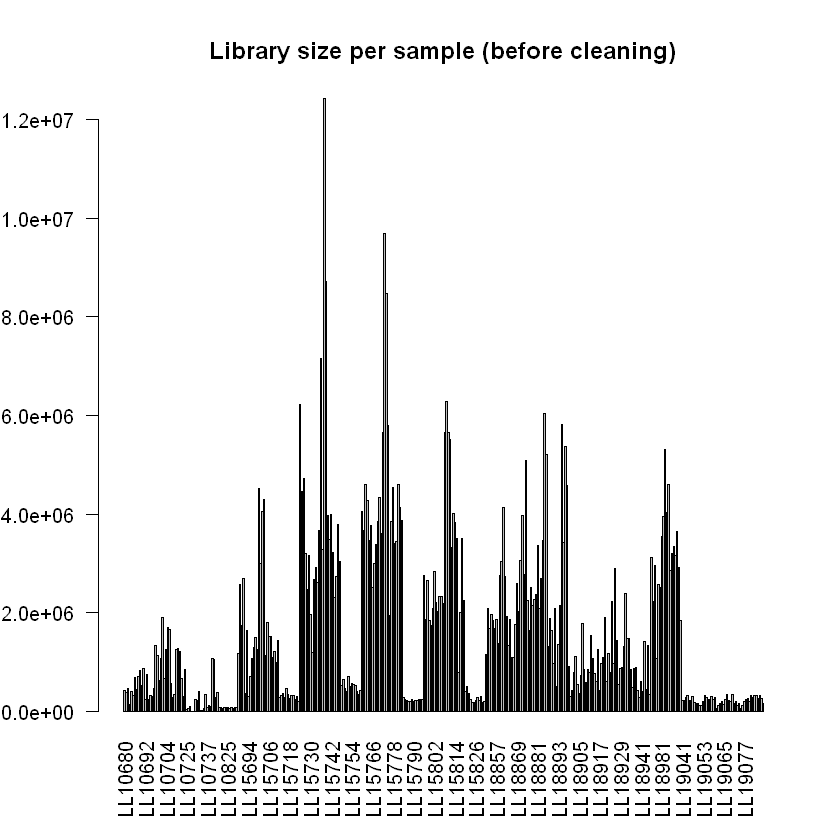

In [25]:
#barplot showing the library size per sample
barplot(x$samples$lib.size, horiz=F, names.arg=colnames(x$counts), las=2,
       main="Library size per sample (before cleaning)")

Part 3: Filtering the DGElist

In [26]:
#Remove the Groups that were found to be outliers

#Subset the meta data to include the Samples that fit the criteria
Samples3 <- dplyr::filter(x$samples, Biofluid %in% c("Plasma", "Serum"))
Samples4 <- dplyr::filter(Samples3, lib.size >= 100000)
x$samples <- Samples4

#filter the counts data with the subsetted samples
n <- rownames(x$samples)
filtercounts2 <- counts %>% dplyr::select(all_of(n))
x$counts <- filtercounts2

#confirmed that the counts and rownames match up
colnames2 <- colnames(x$counts)
rownames2 <- rownames(x$samples)

all.equal(colnames2, rownames2)

dim(x)

[1] TRUE

[1] 1837  256

In [27]:
#normalized the DGElist with TMM method
x <- calcNormFactors(x, method = "TMM")

In [28]:
#subset the DGElist into different objects based off of the target group 

#subsetting the meta data from the DGElist based off of the target group
N <- dplyr::filter(x$samples, Higher_Grouping == "Norgen")
MM <- dplyr::filter(x$samples, Higher_Grouping == "MagMAX_Manufacture")
MSR <- dplyr::filter(x$samples, Higher_Grouping == "MagMAX_Single_RNAClean_XP")
MS <- dplyr::filter(x$samples, Higher_Grouping == "MagMAX_Single")
D <- dplyr::filter(x$samples, Higher_Grouping == "MagMAX_Drydown")
Doubles <- dplyr::filter(x$samples, Higher_Grouping == "MagMAX_Double")
B_P <- dplyr::filter(x$samples, Biofluid == "Plasma")
B_S <- dplyr::filter(x$samples, Biofluid == "Serum")

#function that inputs the meta object and outputs a filtered counts object
sepNames <- function(Gp) {    
    # subsets the count file from the sample list of the meta file input
    ns <- rownames(Gp) 
    ms <- x$counts %>% dplyr::select(all_of(ns))
    
    # removes the miRNAs with 0 counts
    ms <- ms[rowSums(ms[])>0,]
    
    # filters the counts so at least each miRNA has 10+ counts for 70% of the samples
    filterExprs <- filterByExpr(ms, min.count = 10, min.prop = 0.7) 
    ms <- ms[filterExprs,]
    ms
    
    #the counts will have the same samples as the input meta object and 
    #the miRNA kept will have at least 10+ counts for 70% of the sampels
}

#apply the count function for each of the groups
Ncounts <- sepNames(N)
dim(Ncounts)

MMcounts <- sepNames(MM)
dim(MMcounts)

MScounts <- sepNames(MS)
dim(MScounts)

MSRcounts <- sepNames(MSR)
dim(MSRcounts)

Dcounts <- sepNames(D)
dim(Dcounts)

AllDcounts <- sepNames(Doubles)
dim(AllDcounts)

No group or design set. Assuming all samples belong to one group.



[1] 339  51

No group or design set. Assuming all samples belong to one group.



[1] 162  18

No group or design set. Assuming all samples belong to one group.



[1] 224  57

No group or design set. Assuming all samples belong to one group.



[1] 89 10

No group or design set. Assuming all samples belong to one group.



[1] 311  48

No group or design set. Assuming all samples belong to one group.



[1] 263  72

In [29]:
#determine the miRNAs for the target group

# determined the number of miRNA in each of the groups 
MMmirna <- rownames(MMcounts)
Nmirna <- rownames(Ncounts)
MSmirna <- rownames(MScounts)
MSRmirna <- rownames(MSRcounts)
Dmirna <- rownames(Dcounts)
AllDmirna <- rownames(AllDcounts)

#to subset the miRNAs by a certain condition

#function that inputs the count object for group of interest and outputs the miRNA that accounts for the condition
plasmafluid <- function(kn) {
    pla <- dplyr::filter(kn, Biofluid == "Plasma")
    plasCounts <- sepNames(pla)
    kl <- length(rownames(plasCounts))
    kl
}

#function that inputs the count object for group of interest and outputs the miRNA that accounts for the condition
serumfluid <- function(kn) {
    ser <- dplyr::filter(kn, Biofluid == "Serum")
    serCounts <- sepNames(ser)
    kl <- length(rownames(serCounts))
    kl
}

# determined the number of miRNAs in each of the groups, separated by condition
NmirnaBiofluid <- c(plasmafluid(N), serumfluid(N))
MMmirnaBiofluid <- serumfluid(MM)
MSmirnaBiofluid <- c(plasmafluid(MS), serumfluid(MS))
MSRmirnaBiofluid <- serumfluid(MSR)
DmirnaBiofluid <- c(plasmafluid(D), serumfluid(D))
AllDmirnaBiofluid <- c(plasmafluid(Doubles), serumfluid(Doubles))

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.

No group or design set. Assuming all samples belong to one group.



In [30]:
#creates a table organizing the unique miRNAs found by the Group of Interests
numMirna <- c(length(Nmirna), length(MMmirna),  length(MSRmirna), length(MSmirna), length(Dmirna), length(AllDmirna))
NamemiRNA <- c("Norgen miRNA", "MagMAX_Manufacture miRNA", "MagMAX_Single_RNAClean_XP miRNA", "MagMAX_Single miRNA", "DryDown miRNA", "Doubles miRNA")
plasmiRNA <- c(NmirnaBiofluid[1], 0, 0, MSmirnaBiofluid[1], DmirnaBiofluid[1], AllDmirnaBiofluid[1])
sermiRNA <- c(NmirnaBiofluid[2], MMmirnaBiofluid, MSRmirnaBiofluid, MSmirnaBiofluid[2], DmirnaBiofluid[2], AllDmirnaBiofluid[2])

numDF <- data.frame(names_miRNA = NamemiRNA, numberOfmiRNA = numMirna, plasma_miRNA = plasmiRNA, serum_miRNA = sermiRNA)
numDF

names_miRNA,numberOfmiRNA,plasma_miRNA,serum_miRNA
<chr>,<int>,<dbl>,<int>
Norgen miRNA,339,336,320
MagMAX_Manufacture miRNA,162,0,162
MagMAX_Single_RNAClean_XP miRNA,89,0,89
MagMAX_Single miRNA,224,215,196
DryDown miRNA,311,286,295
Doubles miRNA,263,276,221


Part 4: Library Size Plots after Filtering

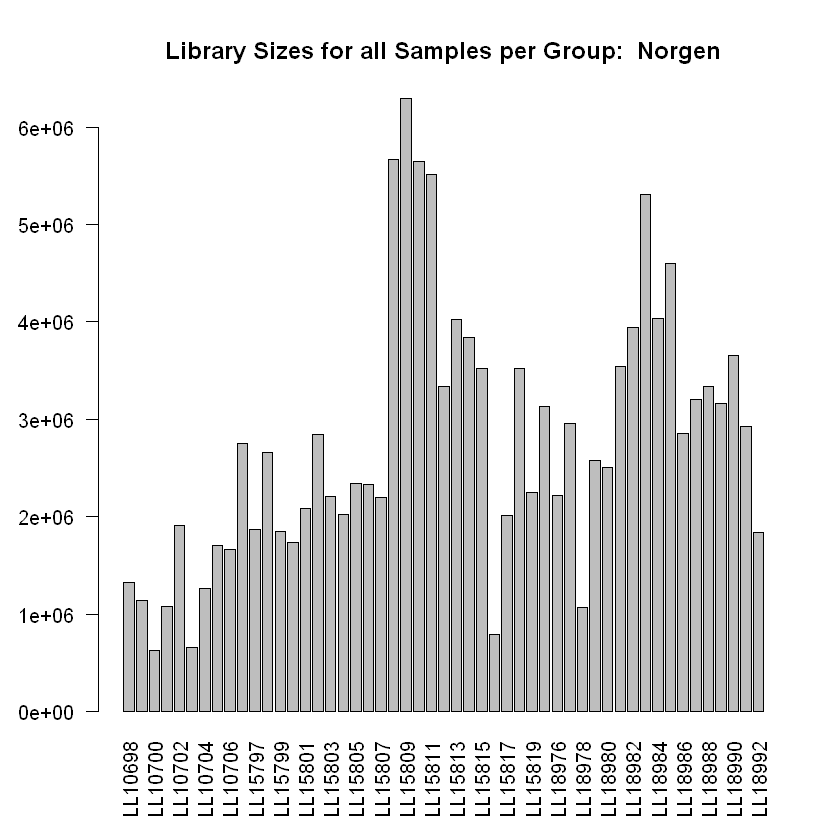

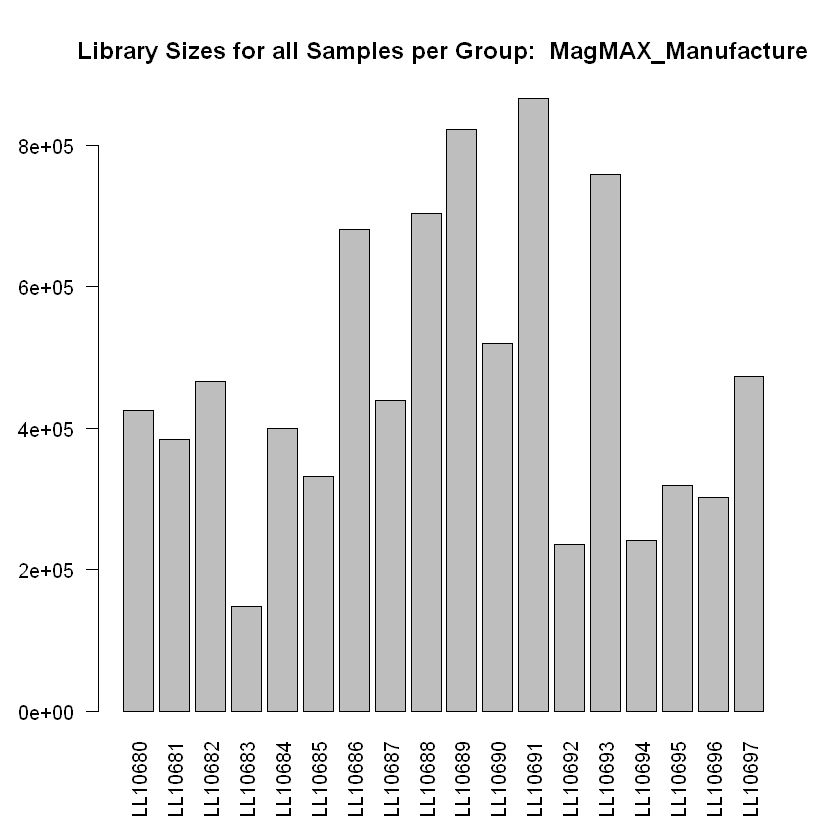

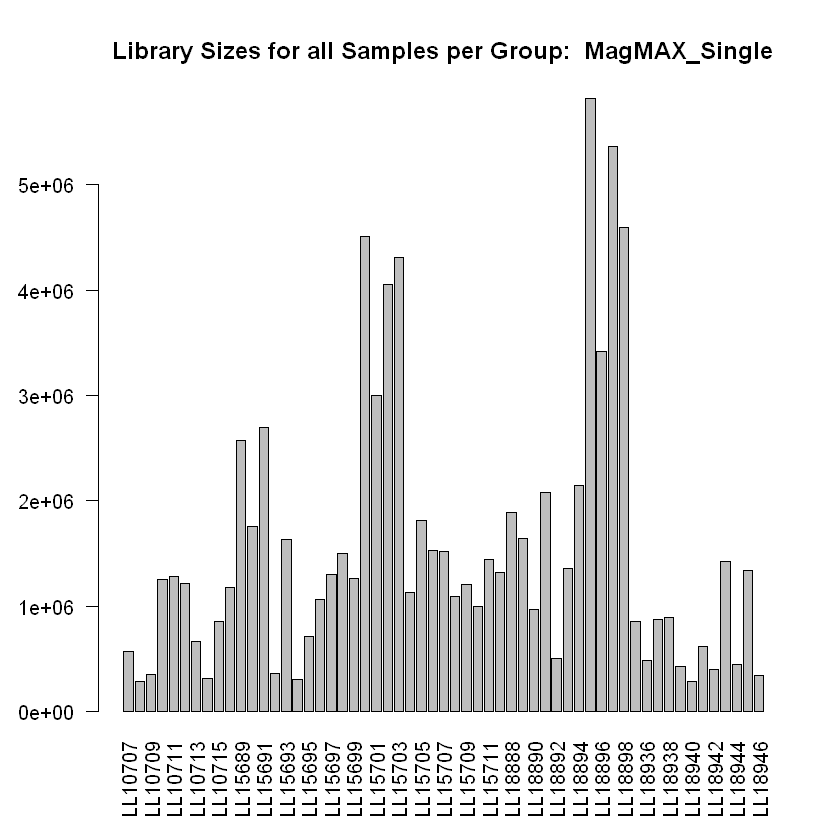

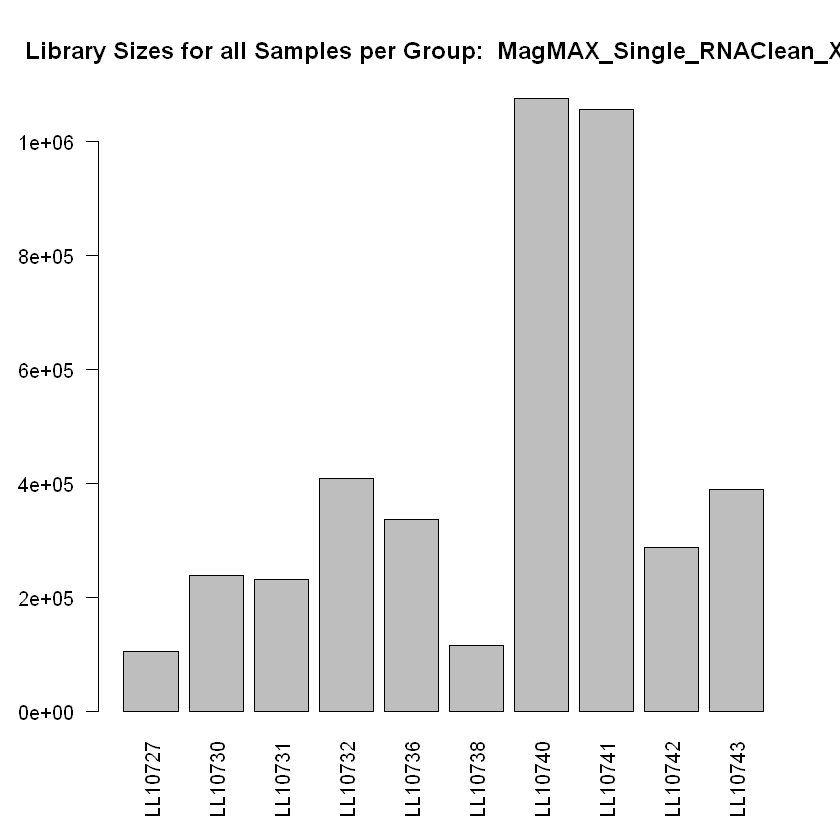

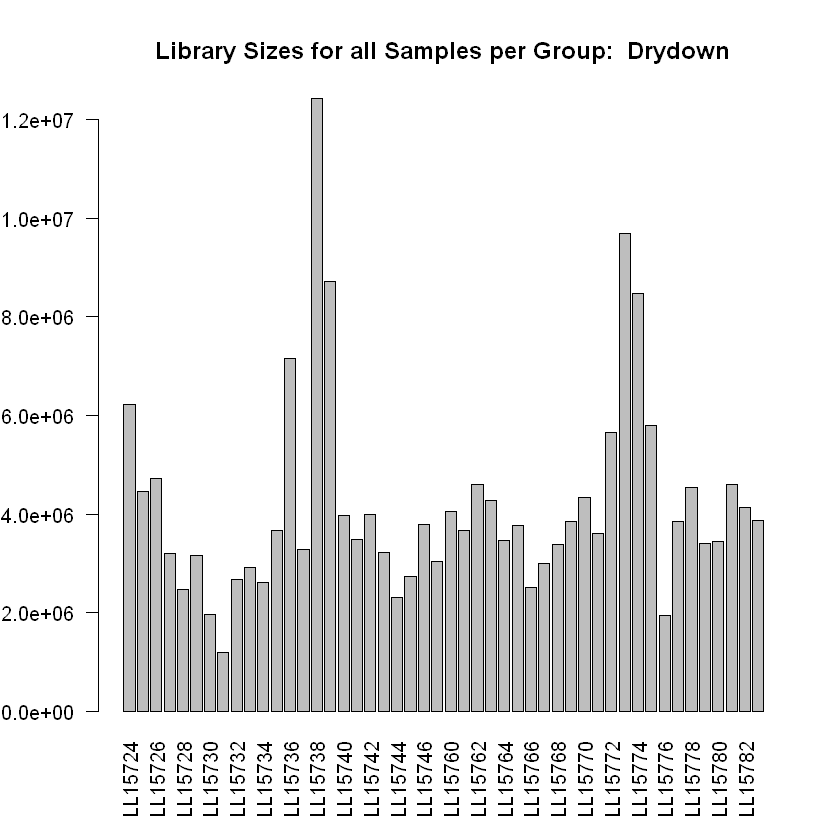

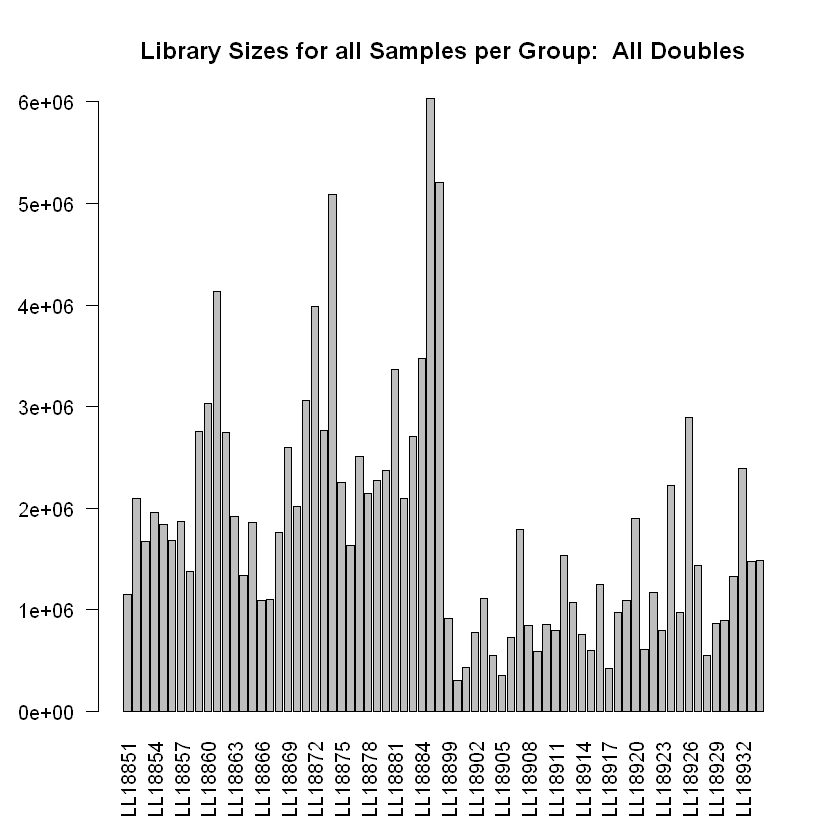

In [31]:
#function to create the barplots for all of the samples
barplots <- function(qw, er) {
    typeSamples <- qw
    tt <- paste("Library Sizes for all Samples per Group: ", er)
    barplot(typeSamples$lib.size, horiz=F, names.arg=rownames(typeSamples), las=2,
       main= tt) 
}

#applied the barplot function to the categories of interest
barplots(N, "Norgen")
barplots(MM, "MagMAX_Manufacture")
barplots(MS, "MagMAX_Single")
barplots(MSR, "MagMAX_Single_RNAClean_XP")
barplots(D, "Drydown")
barplots(Doubles, "All Doubles")

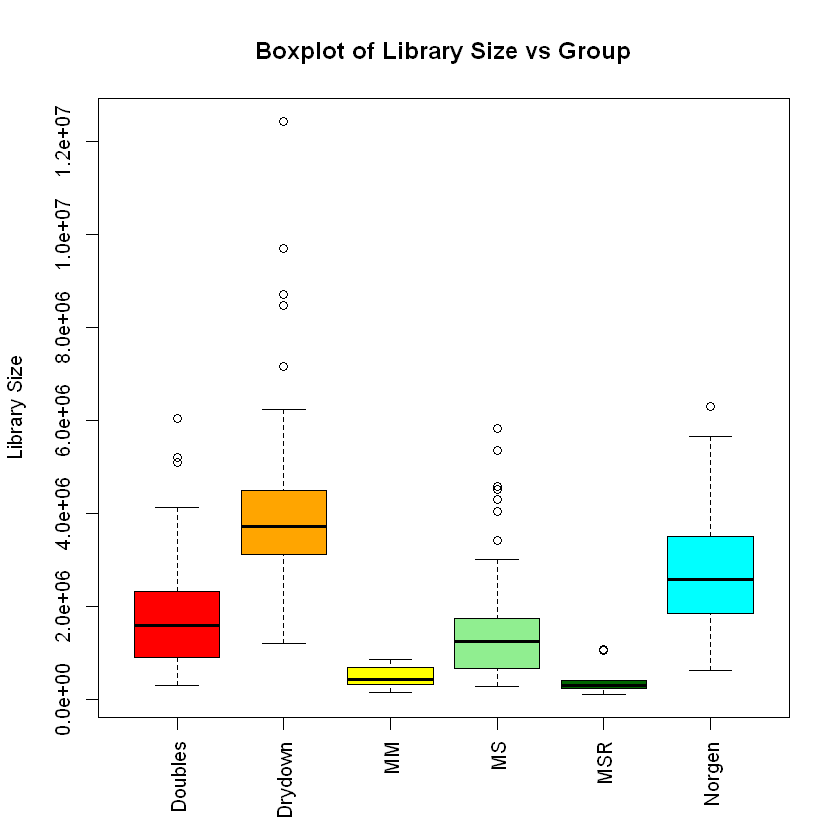

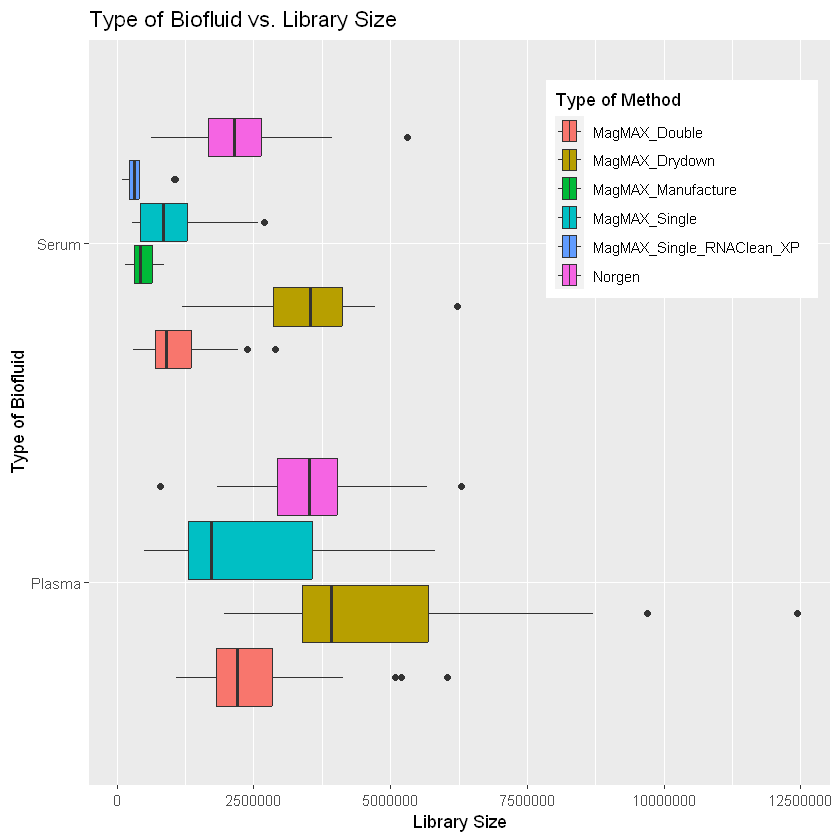

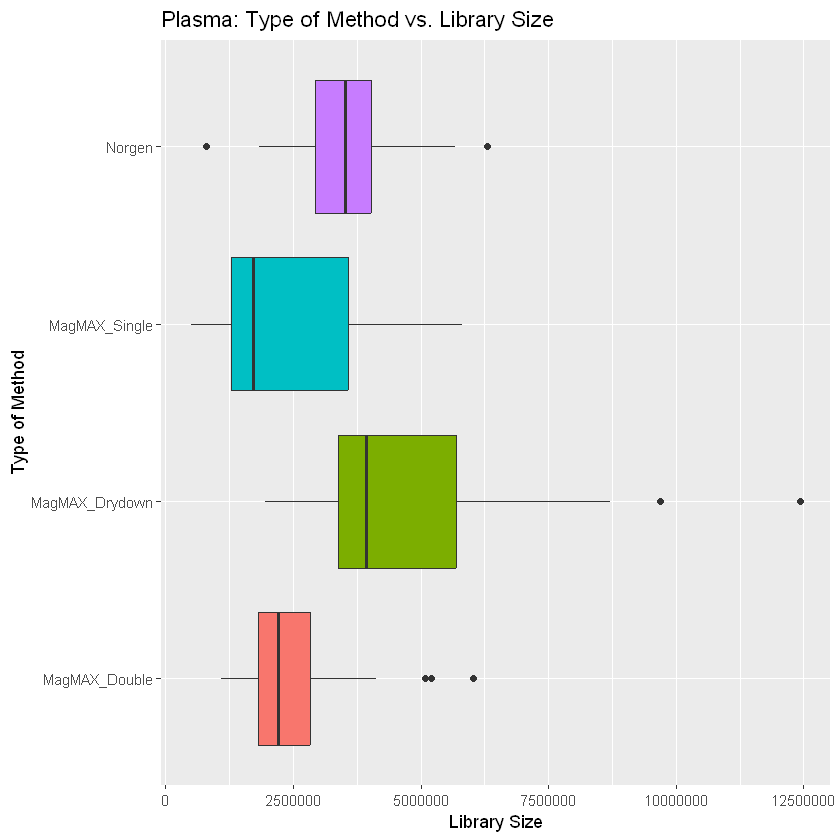

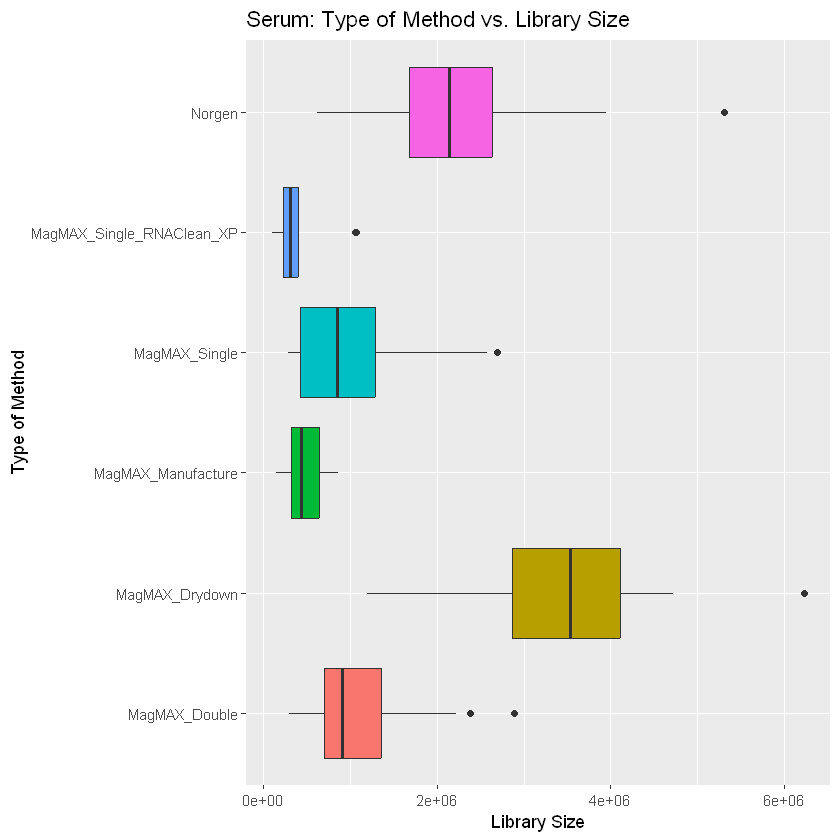

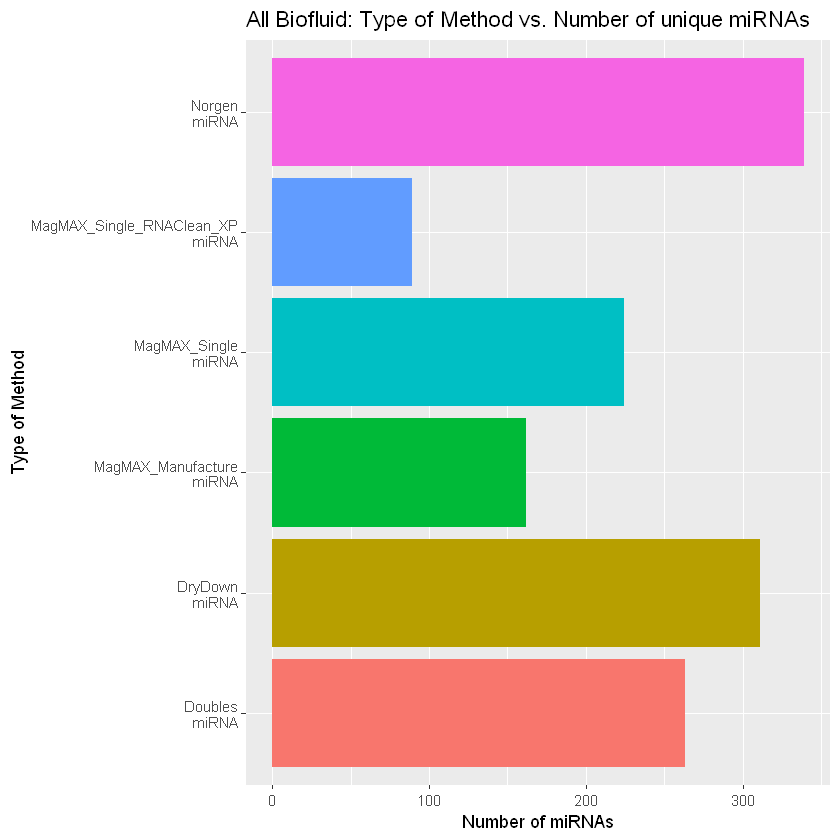

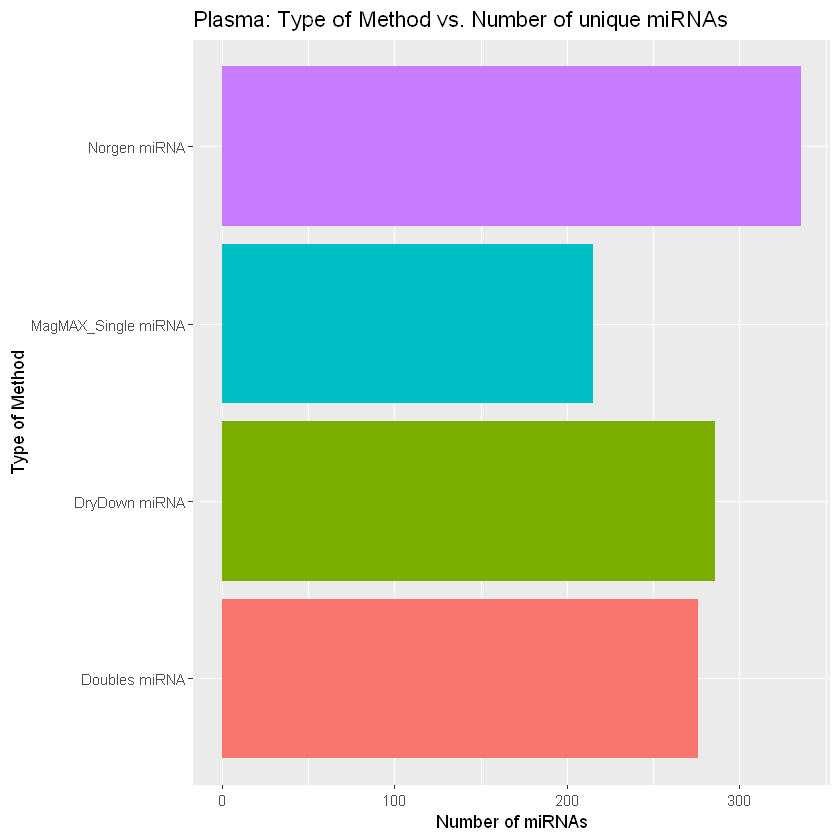

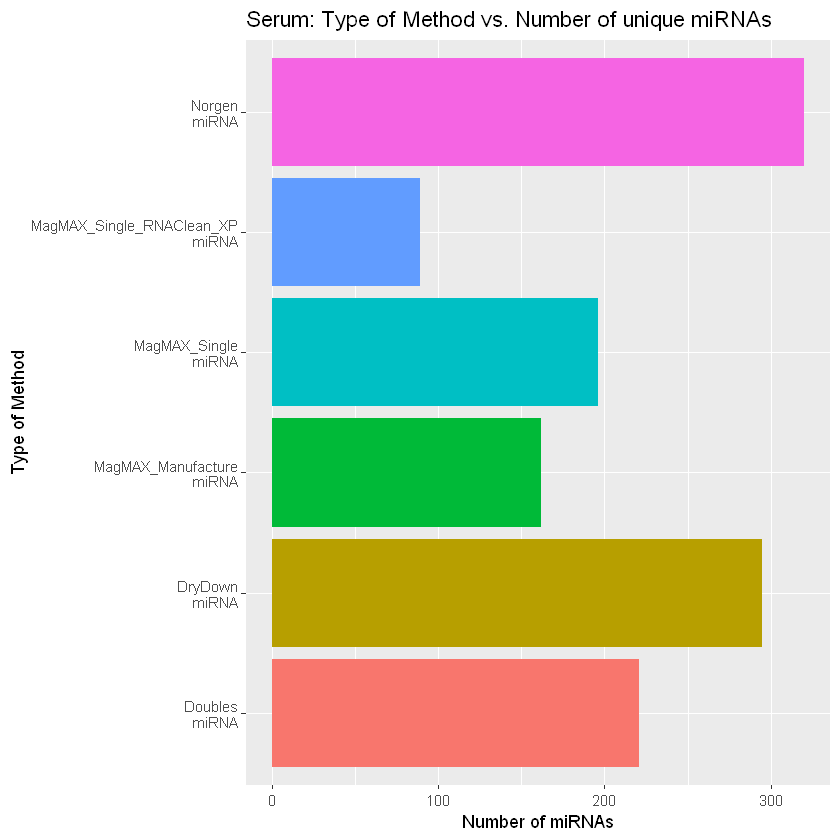

In [32]:
# created additional boxplots, vennDiagrams, and bar graphs to show data

#pdf("lib.size_boxplots_partB_08242023.pdf")

labels <- c("Doubles", "Drydown", "MM", "MS", "MSR", "Norgen")
color <- c("Red", "Orange", "Yellow", "Light Green", "Dark Green", "Cyan", "Blue", "Purple", "Pink")
m <- boxplot(x$samples$lib.size ~ x$samples$Higher_Grouping, data = x$samples, las = 3, 
        main = "Boxplot of Library Size vs Group", ylab = "Library Size", xlab = "",
        col = color, names = labels)

numDF2 <- numDF[-c(2,3),]

#boxplots showing the group of interest vs. library size, separated by the condition
a <- ggplot(x$samples, aes(y = Biofluid, x = lib.size, fill = Higher_Grouping)) + geom_boxplot()
a + labs( y = "Type of Biofluid", x = "Library Size", title = "Type of Biofluid vs. Library Size", fill = "Type of Method") + theme(legend.position = c(0.8, 0.8))

b <- ggplot(B_P, aes(y = Higher_Grouping, x = lib.size, fill = Higher_Grouping)) + geom_boxplot(show.legend = FALSE)
b + labs( y = "Type of Method", x = "Library Size", title = "Plasma: Type of Method vs. Library Size")
            
c <- ggplot(B_S, aes(y = Higher_Grouping, x = lib.size, fill = Higher_Grouping)) + geom_boxplot(show.legend = FALSE)
c + labs( y = "Type of Method", x = "Library Size", title = "Serum: Type of Method vs. Library Size")

numDF$names_miRNA <- str_wrap(numDF$names_miRNA, width = 10)

#bar plots showing the number of unique miRNAs for groups of interest, and separated by condition
d <- ggplot(numDF, aes(numberOfmiRNA, names_miRNA, fill = names_miRNA)) + geom_col(show.legend = FALSE)
d + labs(x = "Number of miRNAs", y = "Type of Method", title = "All Biofluid: Type of Method vs. Number of unique miRNAs")

e <- ggplot(numDF2, aes(plasma_miRNA, names_miRNA, fill = names_miRNA)) + geom_col(show.legend = FALSE) 
e + labs(x = "Number of miRNAs", y = "Type of Method", title = "Plasma: Type of Method vs. Number of unique miRNAs")

f <- ggplot(numDF, aes(serum_miRNA, names_miRNA, fill = names_miRNA)) + geom_col(show.legend = FALSE) 
f + labs(x = "Number of miRNAs", y = "Type of Method", title = "Serum: Type of Method vs. Number of unique miRNAs") 

#dev.off()

Part 5: MDS Plots (including Glimma)

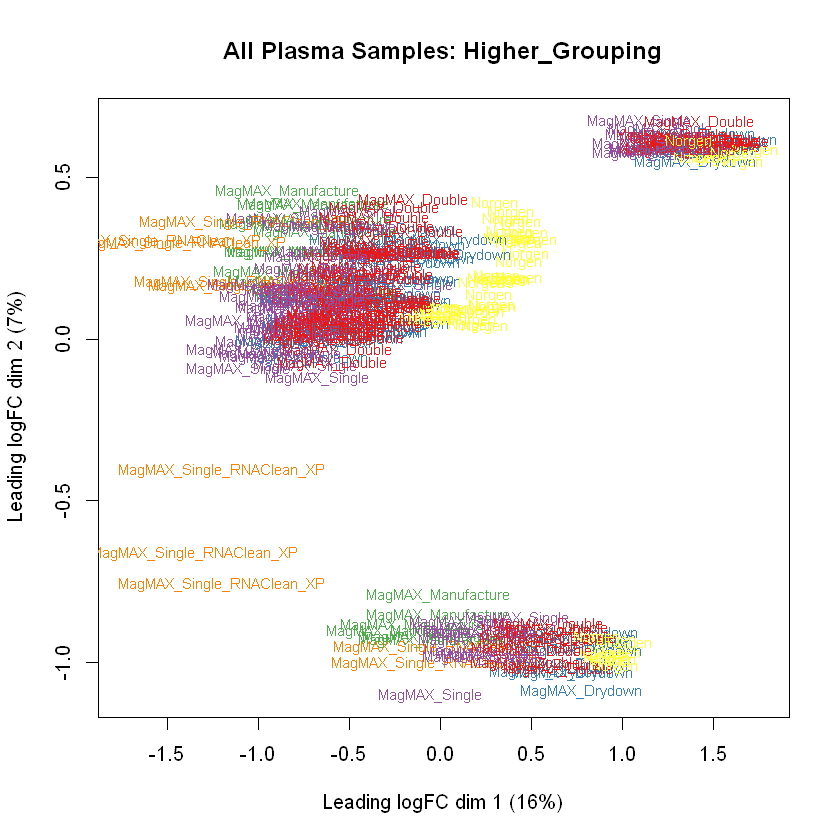

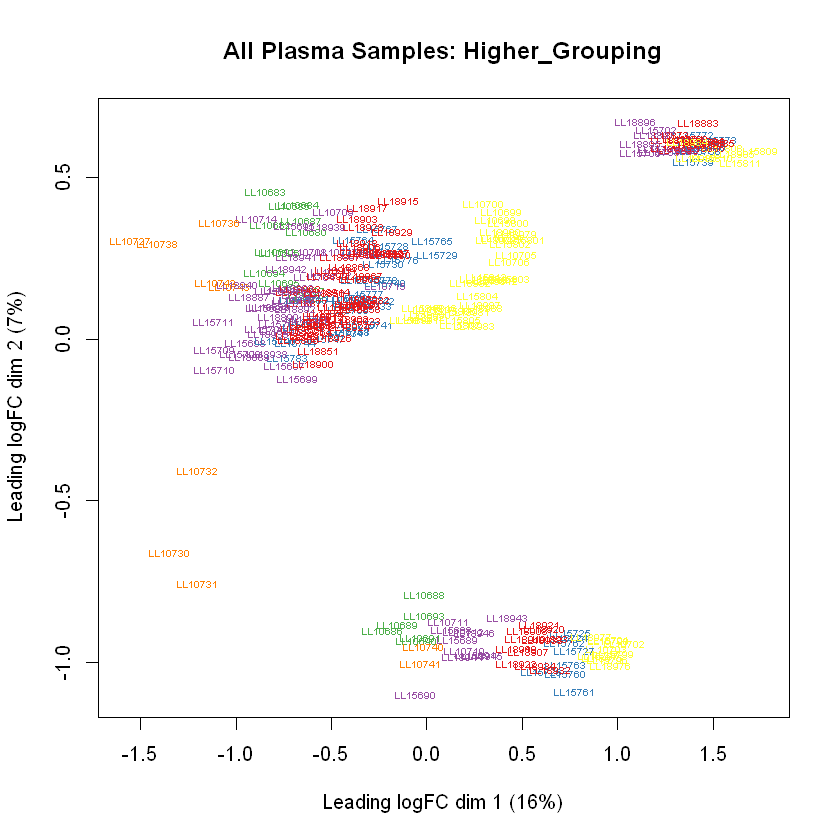

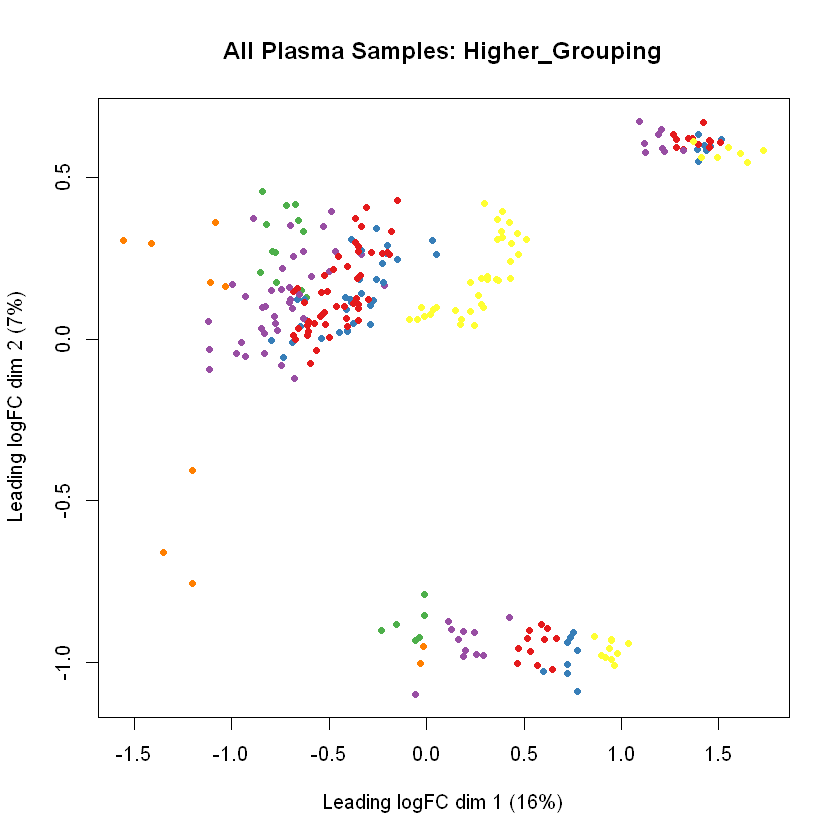

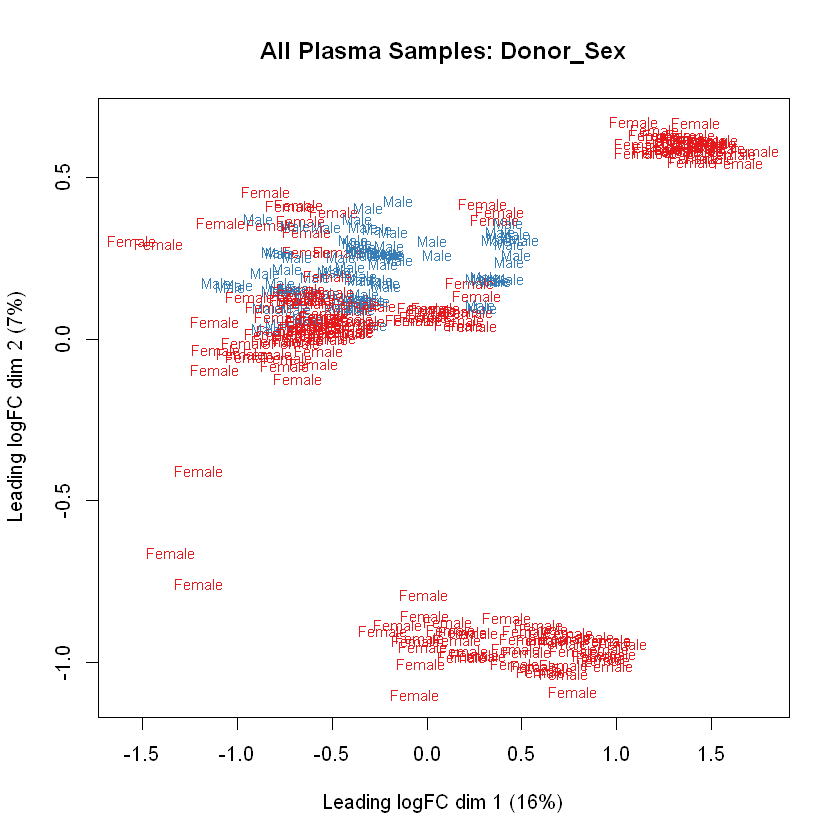

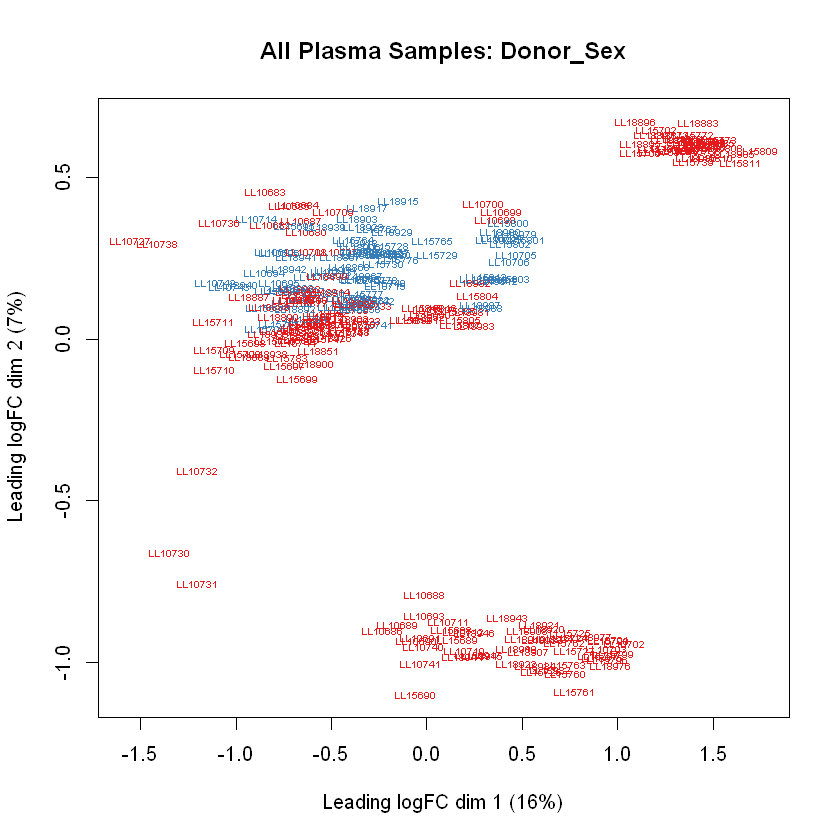

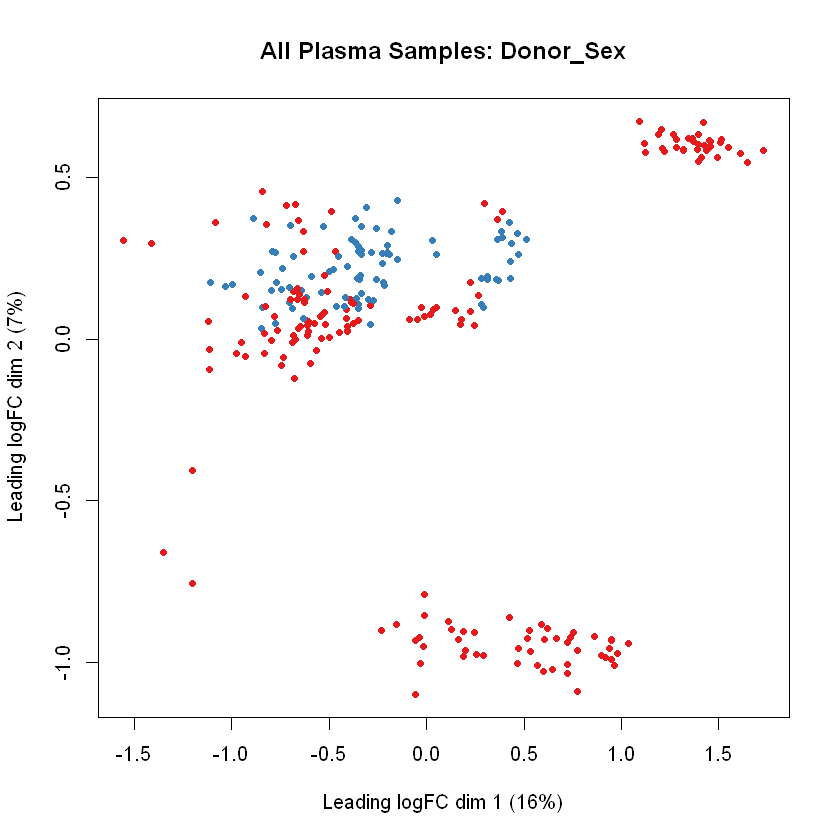

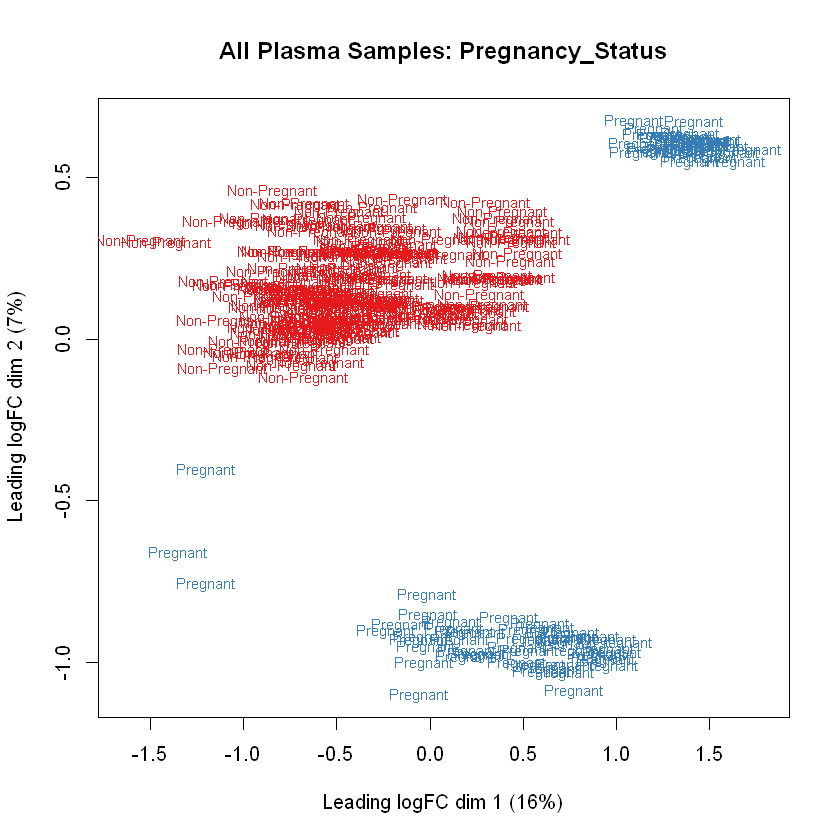

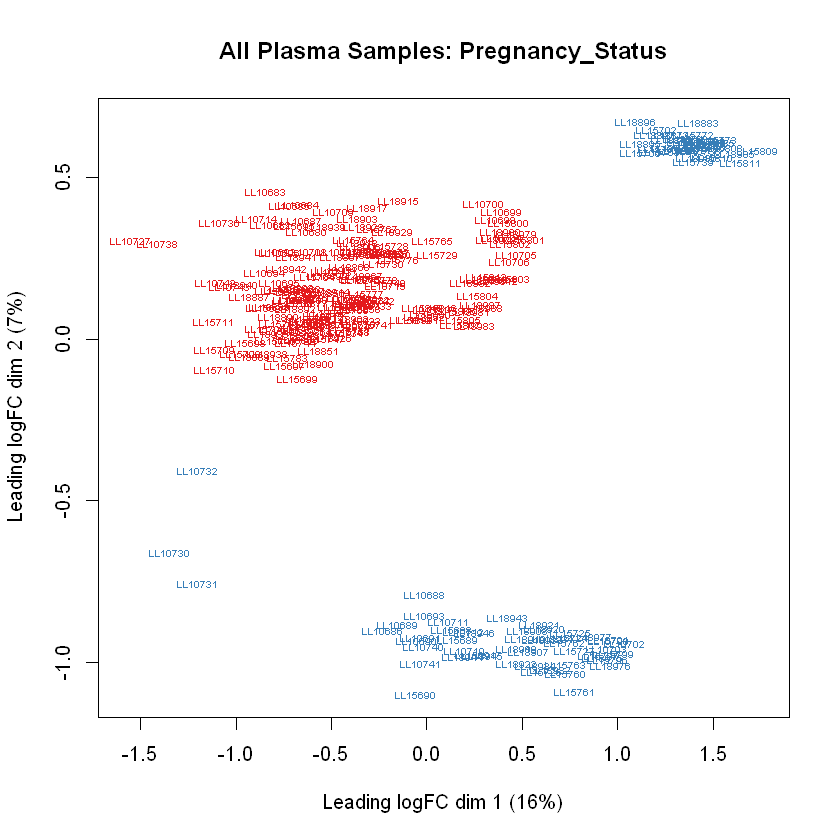

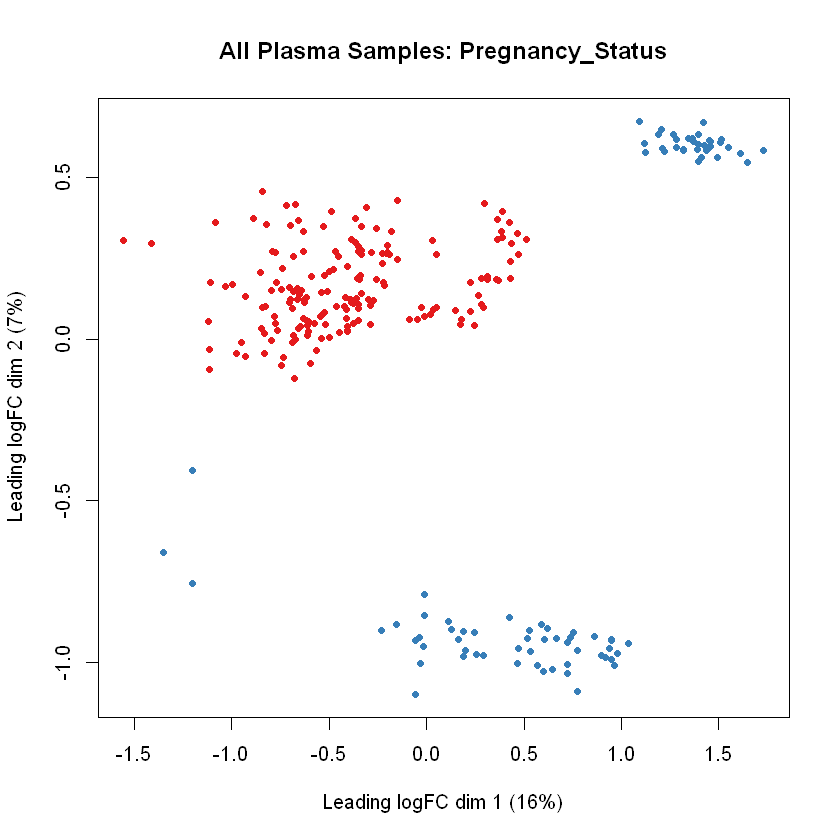

In [33]:
#Create MDS plots

#put the variables of interest
variablelist <- c("Higher_Grouping", "Donor_Sex", "Pregnancy_Status")

for (i in variablelist){
    new_factor <- as.factor(x$samples[,i])
    col.1 <- new_factor
    char.1 <- new_factor
    levels(col.1)<-c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999','#66C2A5','#FC8D62','#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3')
    #levels(col.1) <-  brewer.pal(nlevels(col.1), "Set1")
    col.1 <- as.character(col.1)
    levels(char.1) <- c(0:nlevels(char.1))
    m <- paste("All Plasma Samples:", i)
    plotMDS(x, labels=new_factor, col=col.1, cex=.75)
    title(main=m)
    plotMDS(x, labels=x$samples$LL_ID, col=col.1, cex=.5)
    title(main=m)
    plotMDS(x, pch=19, col=col.1, cex=.75)
    title(main=m)
}

In [34]:
#Interactive MDS plot
library(Glimma)
glMDSPlot(x, 
          groups=x$samples)